<h1> 3. Descomposición de series temporales </h1>


In [151]:
library(fpp3)
library(readr)
library(tseries)
library(dplyr)
library(ggplot2)
library(zoo)
library(quantmod)
library(forecast)
library(slider)
library(tidyverse)
library(TTR) #Para medias moviles

Los datos de series temporales pueden exhibir una variedad de patrones y, a menudo, es útil dividir una serie temporal en varios componentes, cada uno de los cuales representa una categoria de patrón subyacente. Cuando descomponemos una serie de tiempo en componentes, generalmente combinamos la tendencia y ciclo en un solo componente **de tendencia-ciclo** (a menudo llamado simplemente **tendencia** por simplicidad). Por lo tanto, podemos pensar en una serie de tiempo como compuesta por $3$ componentes:
1. Componente de ciclo tendencia.
2. Componente estacional.
3. Componente de resto (que contiene cualquier otra cosa en la serie de tiempo).

Para algunas series de tiempo (por ejemplo, aquellas que se observan al menos diariamente), puede haber más de un componente estacional, correspondiente a los diferentes períodos estacionales. En este capítulo, consideramos los métodos más comunes para extraer estos componentes de una serie de tiempo. A menudo, esto se hace para ayudar a mejorar la comprensión de la serie temporal, pero también se puede utilizar para mejorar la precisión del pronóstico.

Al descomponer una serie de tiempo, a veces es útil transformar o ajustar primero la serie para que la descomposición (y el análisis posterior) sea lo más simple posible. Entonces, comenzaremos discutiendo las transformaciones y los ajustes.

<h2> 3.1 Transformaciones y ajustes </h2> 

El ajuste de los datos históricos a menudo puede conducir a una serie temporal más simple. Aquí nos ocupamos de cuatro tipos de ajustes.
1. Ajustes de calendario.
2. Ajustes de población.
3. Ajustes de inflación.
4. Transformaciones matemásticas.

El propósito de estos ajustes y transformaciones es simplificar los patrones en los datos históricos eliminando o haciendo que el patrón se más consistente en todo el conjunto de datos. Los patrones más simples suelen ser más fáciles de modelar y conducnen a pronósticos más precisos.

<h3> 3.1.1 Ajustes de calendario </h3>

Parte de la variación observada en los datos estacionales puede deberse a simples efectos de calendario. En tales casos, suele ser mucho más fácil eliminar la variación antes de realizar más análisis. Por ejemplo, si está estudiando las ventas mensuales totales en una tienda minorista habrá una variación entre los meses simplemente debido a la diferente cantidad de días comerciales en cada mes, además de la variación estacional a lo largo del año. Es fácil eliminar esta variación calculando las ventas promedio por día de negociación en cada mes, en lugar de las ventas totales en el mes. Luego eliminamos efectivamente la variación del calendario.


<h3>  3.1.2 Ajustes de población </h3>

Cualquier dato que se vea afectado por cambios en la población se puede ajustar para dar datos per cápita. Es decir, considere los datos por persona (o por mil personas, o por millón de personas) en lugar de total. Por ejemplo, si está estudiando la cantidad de camas en un hospital en una región en particular a lo largo del tiempo, los resultados son mucho más fáciles de interpretar si elimina los efectos de los cambios de población considerando la cantidad de camas por cada mil personas. Luego puede ver si ha habido aumentos reales en el número de camas o si los aumentos se deben completamente al aumento de la población. Es posible que aumente el número total de camas, pero que disminuya el número de camas por cada mil personas. Esto ocurre cuando la población aumenta más rápido que el número de camas de hospital. Para la mayorpia de los datos que se ven afectados por los cambios de población.

<h3> 3.1.3 Ajustes por inflación </h3>

Los datos que se ven afectados por el balor del dinero se ajustan mejor antes del modelado. Por ejemplo, el costo promedio de una casa nueva habrá aumentado en las últimas décadas debido a la inflación. Una casa de $200,000.00$ este año no es lo mismo que una casa de $200,000.00$ hace $20$ años. Por esta razón, las series de tiempo financieras generalmente se ajustan ara que todos los valores se expresen en dólres de un año en particular. Por ejemplo, los datos del precio de la vivienda pueden expresarse en dólares del año $2000$.

Para realizar estos ajustes se utiliza un índice de precios. Si $z_t$ denota el índice de precios y $y_t$ denota el precio original de la vivienda en el año $t$, entonces $x_t=\frac{y_t}{z_t\cdot z_{2000}}$ da el precio ajustado de la vivienda a valores en dólares del año $2000$. Los índices de precios son construidos por agencias gubernamentales.  Para los bienes de consumo, un índice de precios común es el Índice de Precios al Consumidor (**IPC**). Esto nos permite comparar el crecimiento o declive de las industrias en relación con un valor de precio común.

<h3> 3.1.4 Transformaciones matemáticas </h3>

Si los datos muestran una variación que aumenta o disminuye con el nivel de la serie, entonces una transformación puede ser útil. Por ejemplo, una transformación logarítmica suele ser útil. Si denotamos las observaciones originales como $y_1,\ldots ,y_T $ y las observaciones transformadas como $w_1, \ldots ,w_T$, entonces $w_t=log(y_t)$. Los logaritmos son útiles porque son interpretables: los cambios en un valor logarítmico son cambios relativoss (o porcentuales) en la escala original. Entonces, si se usa la base logarítmica $10$, entonces un aumento de $1$ en la escala logarítmica corresponde a una multiplicación de $10$ en la escala original.  Si algún valor de la serie original es cero o negativo, los logaritmos no son posibles.

Aveces también se utilizan otras transformaciones (aunque no son tan interpretables). Por ejemplo, se pueden usar raíces cuadradas y raíces cúbicas. Estas se llaman **transformaciones de potencia** porque se pueden escribir en la forma $w_t=y_t^p$

 Una familia útil de transformaciones, que incluye tanto logartimos como transofrmaciones de porytencia, es la familia de **transformaciones de Box-Cox**, que dependen del parámetro $\lambda $ y se definen como sigue:
$$w_t =\left\{ \begin{array}{ll} log(y_t) & Si\; \lambda =0 \\ \frac{sign(y_t)|y_t|^\lambda -1}{\lambda } & e.o.c \end{array} \right. $$
Esta es en realidad una transofmación de Box-Cox modificada, que permite valores negativos de $y_t$ siempre que $\lambda >0$
El logaritmo en una transformación de Box-Cox es siempre un logaritmo natural (es decir, en base $e$). Entonces, si $\lambda =0$, se usan logaritmos naturales, pero si $\lambda \neq 0$, se usa una transformación de potencia, seguida de una escala simple. 

Si $\lambda  =1$, entonces $w_t =y_t-1$, por lo que los datos transformados se desplazan hacia abajo pero no hay cambios en laa forma de la serie temporal. Para todos los demás valores de $\lambda $, la serie temporal cambiará de forma.





In [215]:
setwd("C:\\Users\\81799\\OneDrive\\Documentos\\ESFM_CLASES\\Servicio Social ARTF\\Machine Learning\\section1\\ARTF_2017_2020\\ABRIL_ARTF")
Ton_Netas_P <- read.csv("Toneladas_Netas__Productos_2014_2022.csv")
Ton_Netas_P <- Ton_Netas_P[-99,]
Ton_Netas_P$X <- as.yearmon(as.factor(Ton_Netas_P$X), format ="%m/%Y")
Ton_Netas_P <- xts(Ton_Netas_P[,c(2:6)], order.by = Ton_Netas_P$X )
T_N_P <-  data.frame(Ton_Netas_P) #Ordeno por fechas y la trae como indice
Maiz_ts <- ts(T_N_P[,1],  frequency = 12, star = c(2014,1))

<h3> 3.2.1 Descomposición por el método STL </h3>

Utilizando el método de descomposición **STL**, tenemos lo siguiente:

In [108]:
stl(Maiz_ts, s.window="period")

 Call:
 stl(x = Maiz_ts, s.window = "period")

Components
           seasonal   trend    remainder
Jan 2014 -145252.29 1074353  108632.7516
Feb 2014 -275601.85 1068571   48966.9949
Mar 2014 -108794.71 1062790   14872.4444
Apr 2014  -51897.07 1058809   54982.6408
May 2014  169027.51 1054829 -177494.8337
Jun 2014  281856.69 1051824 -112790.4159
Jul 2014  141604.32 1048819  -80952.8739
Aug 2014  117667.92 1046863   39449.2067
Sep 2014   39841.73 1044906   74709.6638
Oct 2014 -156427.94 1057508    5412.5000
Nov 2014   44609.85 1070110 -170750.8949
Dec 2014  -56634.15 1097662  -25523.3835
Jan 2015 -145252.29 1125215  -63638.2602
Feb 2015 -275601.85 1149623  -70525.6703
Mar 2015 -108794.71 1174030   -9688.5205
Apr 2015  -51897.07 1192686   75699.2023
May 2015  169027.51 1211342  100867.7575
Jun 2015  281856.69 1228931  197659.5416
Jul 2015  141604.32 1246520    6566.0209
Aug 2015  117667.92 1261789   28200.7957
Sep 2015   39841.73 1277058   -5213.3712
Oct 2015 -156427.94 1285711  -95865.9471

El resultado anterior muestra los componentes de una descomposición **STL**. La **trend** columna (que contiene la tendencia-ciclo $T_t$) sigue el movimiento general de la serie, ignorando cualquier estacionalidad y fluctuaciones aleatorias. Como se muestra en la siguiente gráfica

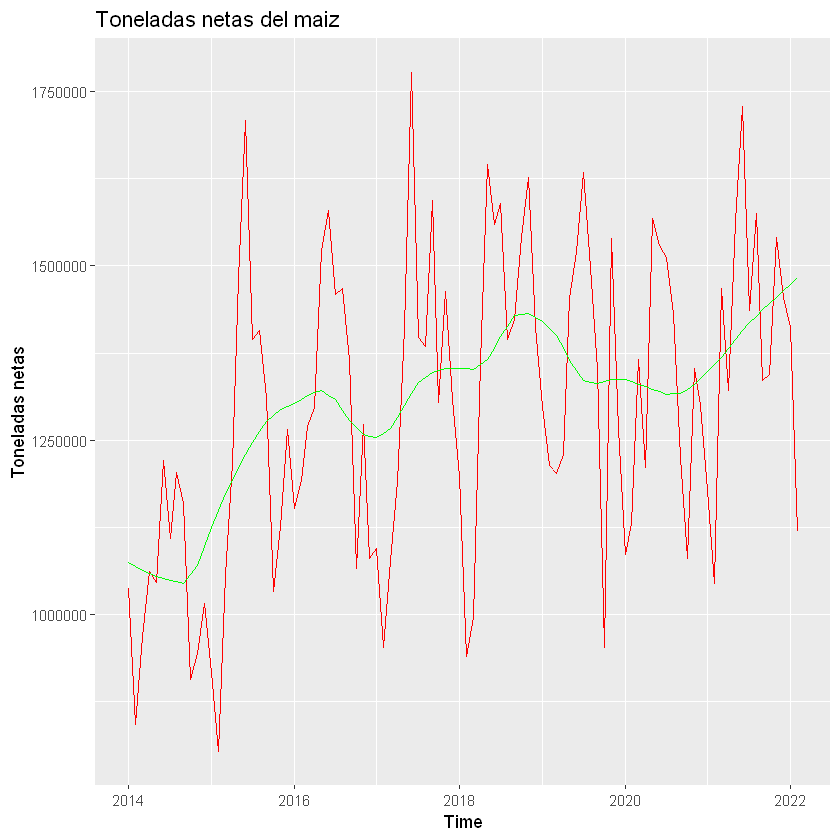

In [112]:
stl <- data.frame(stl(Maiz_ts, s.window="period")$time.series) #Descomposición de la serie por el método STL
autoplot(Maiz_ts, colour ="red")+
geom_line(aes(y=stl$trend), colour = "green")+
labs(y ="Toneladas netas", title = "Toneladas netas del maiz")

Podemos graficar todos los componentes en una sola figura de la siguiente manera:

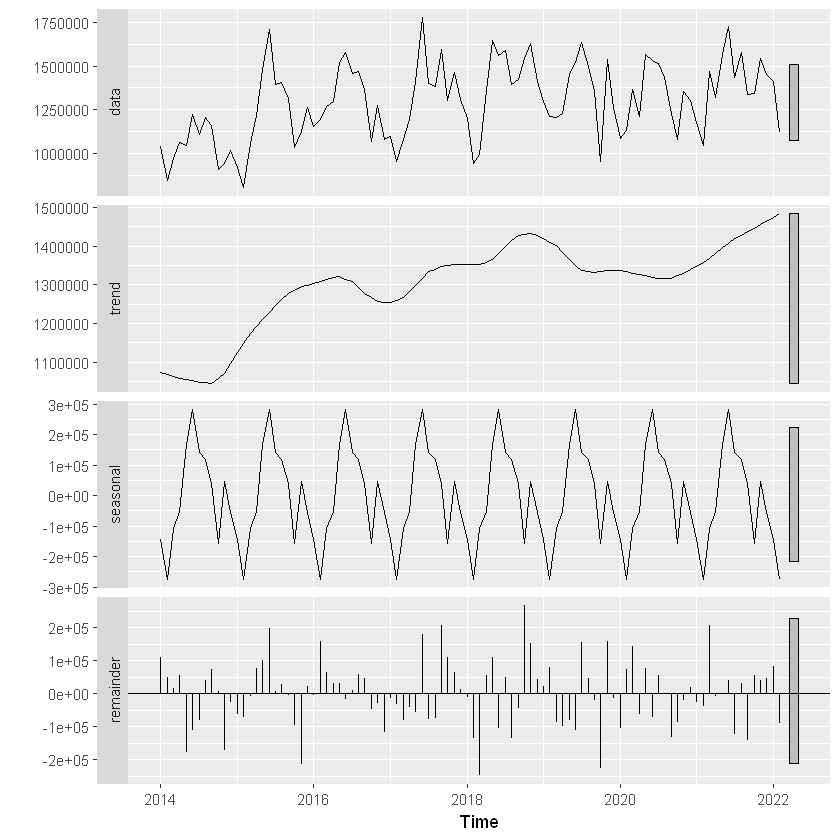

In [115]:
autoplot(stl(Maiz_ts, s.window="period"))

Los $3$ componetes se muestran por separado en los tres paneles inferiores. Estos componentes se pueden sumar para reconstruir los datos que se muestran en el panel superior. Tengan en cuenta que el componente estacional cambia con el tiempo, por lo que dos años consecutivos tienen patrones similares, pero los años separaados pueden tener diferentes patrones estacionales. El componente restante que se muestra en el panel inferior es lo que queda cuando los componentes estacionales y de ciclo de tendencia se restaron de los datos.

Las barras grises de la derecha de cada panel muestran las escalas relativas de los componentes. Cada barra gris representa la misma longitud  pero debido a que las gráficas están en diferentes escalas, las barras varían en tamaño. La barra gris grande en el panel inferior muestra que la variación en el componente restante es menor en comparación con la variación en los datos. Si redujéramos los tres paneles inferiores hasta que sus barras tuvieran el mismo tamaño que las del panel de datos, entonces todos los paneles estarían en la misma escala.

<h3> 3.2.2 Descomposición por la función decompose() de R </h3>

Haciendo lo mismo que en el punto $3.2.1$ tendremos lo siguiente:

In [117]:
decompose(Maiz_ts) #Descomposicón de la serie por el método decompose 

$x
           Jan       Feb       Mar       Apr       May       Jun       Jul
2014 1037733.6  841936.6  968867.5 1061894.8 1046361.4 1220890.4 1109470.9
2015  916324.4  803495.1 1055547.1 1216488.3 1481237.2 1708447.4 1394690.7
2016 1151765.0 1192223.4 1269109.9 1296962.5 1522123.0 1579058.8 1458302.9
2017 1094419.1  952764.9 1077635.7 1190780.7 1410637.8 1777352.4 1397730.8
2018 1197400.4  939691.1  995145.6 1361005.3 1645195.0 1558841.7 1589994.9
2019 1298361.2 1213312.8 1202920.1 1230037.4 1453447.6 1520640.7 1634203.5
2020 1086484.4 1130574.9 1365206.0 1211035.2 1567916.6 1529451.7 1511977.6
2021 1177533.1 1043996.2 1467083.3 1321736.0 1563662.3 1728951.7 1435664.5
2022 1410967.6 1118409.3                                                  
           Aug       Sep       Oct       Nov       Dec
2014 1203979.7 1159457.2  906492.2  943968.5 1015504.7
2015 1407658.0 1311686.6 1033417.1 1125823.7 1264619.4
2016 1467896.1 1363641.1 1065388.9 1273013.8 1080231.7
2017 1384385.5 1593865.6 13

Warning message:
"Removed 12 rows containing missing values (geom_path)."

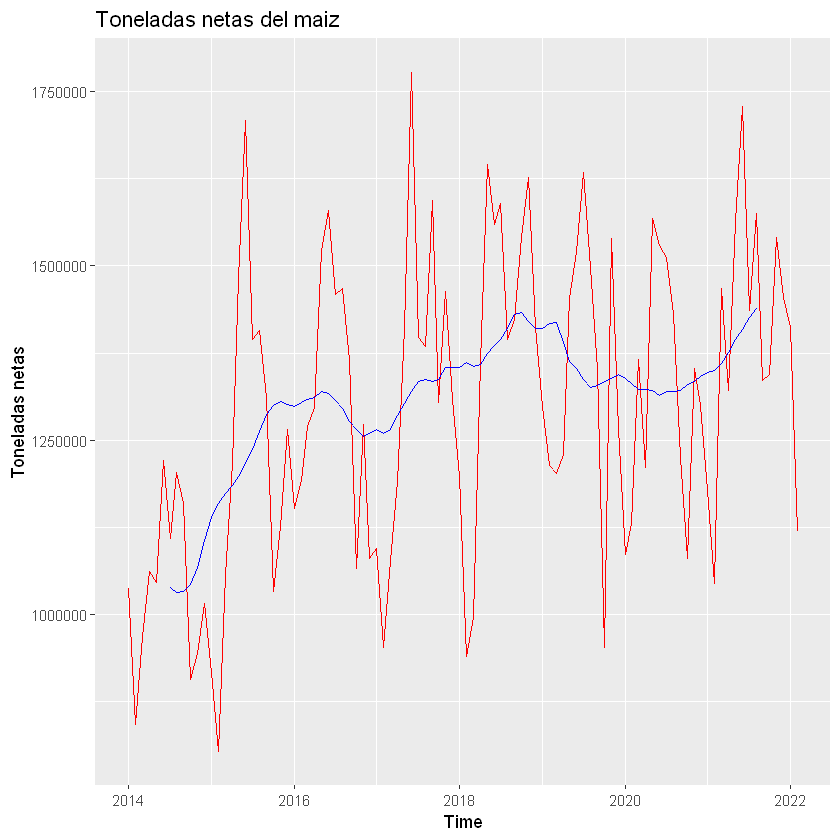

In [118]:
autoplot(Maiz_ts, colour ="red")+
geom_line(aes(y=decompose$trend), colour = "blue")+
labs(y ="Toneladas netas", title = "Toneladas netas del maiz")

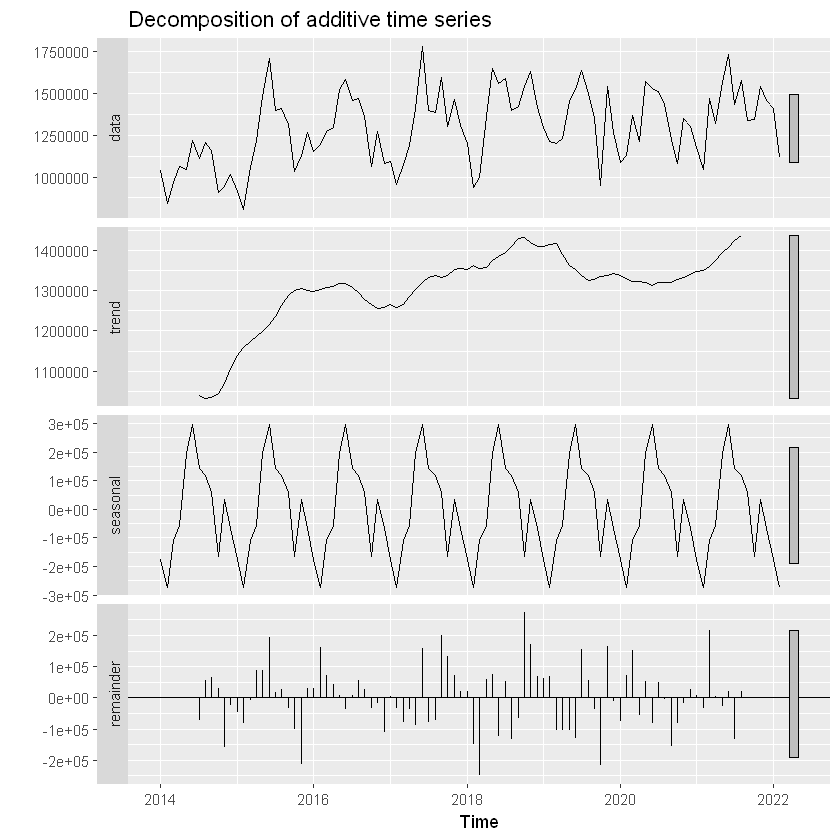

In [120]:
autoplot(decompose(Maiz_ts))

<h3> 3.2.3 Datos desestacionalizados </h3>

Si el componente estacional se elimina de los datos originales, los valores resultantes son los **"Datos ajustados estacionalmente"**. Para una *descomposición aditiva*, los datos ajustados estacionalmente están dados por $y_t-S_t$, y para datos multiplicativos, los valores ajustados estacionalmente se obtienen usando $\frac{y_t}{S_t}$.



Si la variación por estacionalidad no es de interés primario, la serie desestacionalizada puede ser útil. Por ejemplo, los datos mensuales de desempleo generalmente se ajustan estacionalmente para resaltar la variación debida al estado subyacente de la economía en lugar de la variación estacional. Un aumento en el desempleo debido a que abandonan la escuela y buscan trabajo es una variación estacional, mientras que un aumento en el desempleo debido a una recesión económica no es estacional. La mayoría de los analistas económicos que estudian los datos de desempleo están interesados en la variación NO estacional. En consecuencia, los datos de desempleo (y muchas otras series económicas) suelen estar desestacionalizadas. 

Las series desestacionalizadas contienen el componente de resto, así como el ciclo de tendencia. Por lo tanto, no son "suaves" y las "descensos" o "alzas" pueden ser engañosas. Si el propósito es buscar puntos de inflexión en una serie e interpretar cualquier cambio de dirección, entonces es mejor utilizar el componente de tendencia-ciclo en lugar de los datos ajustados estacionalmente.

<h2> 3.3 Medias Móviles </h2>

El método clásico de descomposición de series de tiempo se originó en la década de $1920$ y fue ampliamente utilizado hasta la década de $1950$. Todavía constituye la base de muchos métodos de descomposición de series temporales, por lo que es importante entender como funcionan. El primer paso en una descomposición clásica es usar un método de promedio móvil para estimar el ciclo de tendencia, por lo que comenzaremos analizando los promedios móviles.

<h3> 3.3.1 Suavizado de la media móvil </h3>

Una media móvil de orden $m$ se puede escribir como:$$\hat{T}_t=\frac{1}{m}\sum _{j=-k}^{k}y_{t+j}$$ donde $m=2k+1$. Es decir, la estimación de la tendencia-ciclo en el momento $t$ se obtiene promediando los valores de la serie temporal dentro de $k$ períodos de $t$. También es probable que las observaciones que están cercanas en el tiempo tengan un valor cercano. Por lo tanto, el promedio elimina parte de la aleatoriedad en los datos, dejando un componente suave de ciclo-tendencia. A esto le llamamos $m$**-MA**, lo que significa un promedio móvil de orden $m$.

El orden de la media móvil determina la suavidad de la estimación del ciclo de tendencia. En general, un pedido más grande significa una curva más suave.

In [1]:
MM_Maiz<-T_N_P %>% select(0, MAÍZ) %>% mutate("5-MA"=rollmean(MAÍZ,k=12,fill=NA))
MM_Maiz

ERROR: Error in T_N_P %>% select(0, MAÍZ) %>% mutate(`5-MA` = rollmean(MAÍZ, : no se pudo encontrar la función "%>%"


En la última comulna de esta tabla, se muestra una media móvil de orden $m=5$, que proporciona una estimación de la tendencia-ciclo. El primer valor de esta columna es el promedio de las primero $5$ observaciones, $ene.2014-mayo.2014$; el segundo valor en la columna **5-MA** es el promedio de los valores para $feb.2014-jun.2014$ y así sucesivamente.
Cada valor en la columna **5-MA** es el promedio de las observaciones en la ventana de $5$ meses centrada en el mes correspondiente. 

La columna **5-MA** cotniene los valores de $\hat{T}_t$ con $m=2k+1=5$ y $k=2$. No hay valores ni para los primeros dos años ni pra los dos últimos años, porque no tenemos observaciones en cada lado

Warning message:
"Removed 4 rows containing missing values (geom_path)."

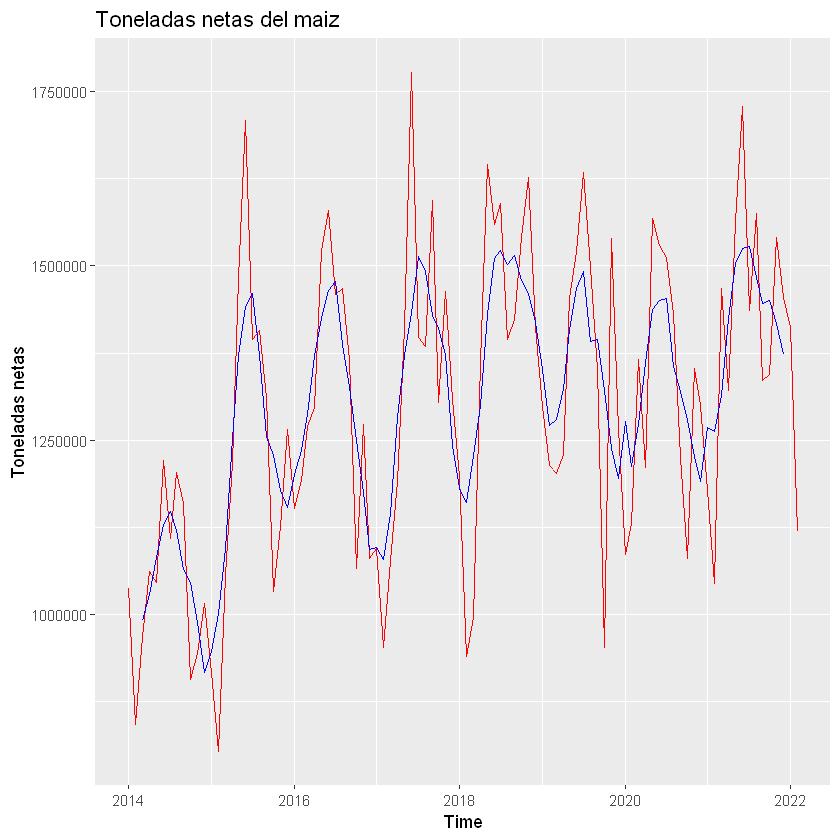

In [255]:
m5_MA <- ts(MM_Maiz[,2], frequency =12 , start=c(2014,1)) #Para poder graficar 5-MA
autoplot(Maiz_ts, colour ="red")+
geom_line(aes(y=m5_MA), colour = "blue")+
labs(y ="Toneladas netas", title = "Toneladas netas del maiz")

<h2> 3.6 Descomposición STL </h2>

STL es un método versátil y robusto para descomponer series de tiempo. STL es un acrónimo de "Descomposición estacional y de tendencias usando Loess", mientras que Loess es un método para estimar relaciones NO lineales. El método STL fue desarrollado por RB Clevenland.  

STL tiene varias ventajas sobre las descomposición clásica y los métodos $SEATS$ y $X-11$.
* A diferencias de $SEATS$ y $X-11$, $STL$ manejará cualquier tipo de estacionalidad, no solo datos mensuales y trimestrales.
* Se permite que el componente estacional cambie con el tiempo, y el usuario puede controlar la tasa de cambio.
* La suavidad del ciclo de tendencia también puede controlar la tasa de cambio.
* Puede ser resistente a valores típicos (es decir, el usuario puede especificar una descomposición robusta), de modo que las observaciones inusuales ocasionales no afectarán las estimaciones y de tendencia-ciclo. Sin embargo, afectaráan al componente restante.

In [140]:
Maiz_ts

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,1037733.6,841936.6,968867.5,1061894.8,1046361.4,1220890.4,1109470.9,1203979.7,1159457.2,906492.2,943968.5,1015504.7
2015,916324.4,803495.1,1055547.1,1216488.3,1481237.2,1708447.4,1394690.7,1407658.0,1311686.6,1033417.1,1125823.7,1264619.4
2016,1151765.0,1192223.4,1269109.9,1296962.5,1522123.0,1579058.8,1458302.9,1467896.1,1363641.1,1065388.9,1273013.8,1080231.7
2017,1094419.1,952764.9,1077635.7,1190780.7,1410637.8,1777352.4,1397730.8,1384385.5,1593865.6,1303444.0,1462605.5,1307751.5
2018,1197400.4,939691.1,995145.6,1361005.3,1645195.0,1558841.7,1589994.9,1394899.8,1422756.9,1540333.0,1627415.7,1411960.7
2019,1298361.2,1213312.8,1202920.1,1230037.4,1453447.6,1520640.7,1634203.5,1498119.5,1351274.6,952244.0,1538732.2,1264958.0
2020,1086484.4,1130574.9,1365206.0,1211035.2,1567916.6,1529451.7,1511977.6,1431310.0,1225618.7,1079972.6,1352228.9,1299678.9
2021,1177533.1,1043996.2,1467083.3,1321736.0,1563662.3,1728951.7,1435664.5,1575463.4,1335967.8,1343687.9,1540361.6,1454103.5
2022,1410967.6,1118409.3,,,,,,,,,,
